# The Bag of Words

In [1]:
import torch 
import transformers 
import datasets
from datasets import load_dataset

## Downloading the Dataset

In [2]:
dataset = load_dataset("stanfordnlp/imdb")

Ask yourself dumb questions: 
1. How to download the dataset? 
    a. Get to know the dataset, like Andrej Karpathy says!
2. How to create a vocabulary from the dataset? 
3. How to create the bag of words vectors knowing the length of the vocabulary? 



In [3]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
print(dataset, dataset.shape, dataset.values, dataset.num_rows)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
}) {'train': (25000, 2), 'test': (25000, 2), 'unsupervised': (50000, 2)} <built-in method values of DatasetDict object at 0x16911fae0> {'train': 25000, 'test': 25000, 'unsupervised': 50000}


In [6]:
import pandas as pd
import matplotlib

Checking the keys of the dictionary: 

In [7]:
dataset.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [8]:
print(dataset['train'])

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [9]:
dataset['train']._data

MemoryMappedTable
text: string
label: int64
----
text: [["I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Real

In [13]:
train_dataset = dataset['train']

Converting to Pandas DataFrame: 

In [14]:
df = pd.DataFrame(train_dataset)

In [15]:
print(df['text'])

0        I rented I AM CURIOUS-YELLOW from my video sto...
1        "I Am Curious: Yellow" is a risible and preten...
2        If only to avoid making this type of film in t...
3        This film was probably inspired by Godard's Ma...
4        Oh, brother...after hearing about this ridicul...
                               ...                        
24995    A hit at the time but now better categorised a...
24996    I love this movie like no other. Another time ...
24997    This film and it's sequel Barry Mckenzie holds...
24998    'The Adventures Of Barry McKenzie' started lif...
24999    The story centers around Barry McKenzie who mu...
Name: text, Length: 25000, dtype: object


In [16]:
print(df.keys())

Index(['text', 'label'], dtype='object')


## Text Data Manipulation

a) String Methods

In [19]:
df['text'] = df['text']  
df['lower_text'] = df['text'].str.lower()
df['word_count'] = df['text'].str.split().str.len()


In [21]:
print(df['lower_text'])

0        i rented i am curious-yellow from my video sto...
1        "i am curious: yellow" is a risible and preten...
2        if only to avoid making this type of film in t...
3        this film was probably inspired by godard's ma...
4        oh, brother...after hearing about this ridicul...
                               ...                        
24995    a hit at the time but now better categorised a...
24996    i love this movie like no other. another time ...
24997    this film and it's sequel barry mckenzie holds...
24998    'the adventures of barry mckenzie' started lif...
24999    the story centers around barry mckenzie who mu...
Name: lower_text, Length: 25000, dtype: object


In [22]:
print(df['word_count'])

0        288
1        214
2         93
3        118
4        311
        ... 
24995    108
24996    183
24997    134
24998    717
24999     55
Name: word_count, Length: 25000, dtype: int64


## Tokenization

In [29]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
df['tokens'] = df['text'].apply(word_tokenize)
print(df['tokens'])

0        [I, rented, I, AM, CURIOUS-YELLOW, from, my, v...
1        [``, I, Am, Curious, :, Yellow, '', is, a, ris...
2        [If, only, to, avoid, making, this, type, of, ...
3        [This, film, was, probably, inspired, by, Goda...
4        [Oh, ,, brother, ..., after, hearing, about, t...
                               ...                        
24995    [A, hit, at, the, time, but, now, better, cate...
24996    [I, love, this, movie, like, no, other, ., Ano...
24997    [This, film, and, it, 's, sequel, Barry, Mcken...
24998    ['The, Adventures, Of, Barry, McKenzie, ', sta...
24999    [The, story, centers, around, Barry, McKenzie,...
Name: tokens, Length: 25000, dtype: object


## Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(df_tfidf)

        00  000  0000000000001  00001  00015  000s  001  003830  006  007  \
0      0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
1      0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
2      0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
3      0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
4      0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
...    ...  ...            ...    ...    ...   ...  ...     ...  ...  ...   
24995  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
24996  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
24997  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
24998  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   
24999  0.0  0.0            0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0   

       ...  était  état  étc  évery  êxtase   ís  ísnt  østbye  über  \
0  

## Text Data Visualization

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

a) Word Frequency

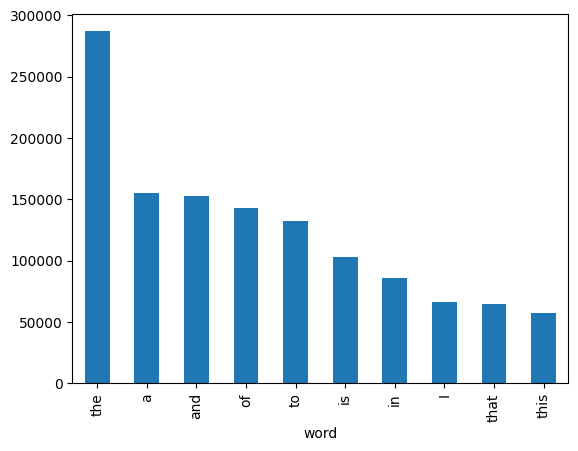

In [42]:
word_freq = Counter(" ".join(df['text']).split())
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Plotting the top 10 words
word_freq_df.head(10).plot(kind='bar', x='word', y='frequency', legend=False)
plt.show()


### Word Clouds

In [44]:
!pip install wordcloud
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 1.0 MB/s eta 0:00:00a 0:00:01


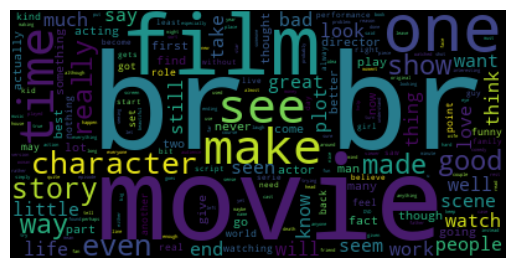

In [45]:
text = " ".join(df['text'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## N-grams Analysis using nltk

In [46]:
df['bigrams'] = df['text'].apply(lambda x: list(nltk.ngrams(x.split(), 2)))
print(df['bigrams'])

0        [(I, rented), (rented, I), (I, AM), (AM, CURIO...
1        [("I, Am), (Am, Curious:), (Curious:, Yellow")...
2        [(If, only), (only, to), (to, avoid), (avoid, ...
3        [(This, film), (film, was), (was, probably), (...
4        [(Oh,, brother...after), (brother...after, hea...
                               ...                        
24995    [(A, hit), (hit, at), (at, the), (the, time), ...
24996    [(I, love), (love, this), (this, movie), (movi...
24997    [(This, film), (film, and), (and, it's), (it's...
24998    [('The, Adventures), (Adventures, Of), (Of, Ba...
24999    [(The, story), (story, centers), (centers, aro...
Name: bigrams, Length: 25000, dtype: object


### Descriptive Statistics

In [47]:
df['word_count'] = df['text'].str.split().str.len()
df.describe()


,label,word_count
count,25000.00000,25000.000000
mean,0.50000,233.787200
std,0.50001,173.733032
min,0.00000,10.000000
25%,0.00000,127.000000
50%,0.50000,174.000000
75%,1.00000,284.000000
max,1.00000,2470.000000


# Naive Bayes Implementation in sklearn

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Downloadig nltk data

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...


True

## Load the dataset

In [37]:
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data 
labels = newsgroups.target

## Preprocess the text data

In [40]:
def preprocess_text(text): 
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text     

texts = [preprocess_text(text) for text in texts]

## Create the Bag of Words representation

In [41]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(texts)
y = labels

### Split the datasaet into training and testing sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((15076, 187024), (15076,))

## Training

In [47]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Predict the class of the new document

In [48]:
y_pred = nb_classifier.predict(X_test)

## Evaluate the classifier

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8893899204244032
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       151
           1       0.72      0.91      0.81       202
           2       0.93      0.70      0.80       195
           3       0.69      0.86      0.77       183
           4       0.94      0.92      0.93       205
           5       0.89      0.87      0.88       215
           6       0.90      0.67      0.77       193
           7       0.90      0.94      0.92       196
           8       0.96      0.93      0.94       168
           9       0.98      0.97      0.97       211
          10       0.94      0.98      0.96       198
          11       0.91      0.96      0.93       201
          12       0.93      0.85      0.89       202
          13       0.96      0.95      0.95       194
          14       0.95      0.97      0.96       189
          15       0.82      0.99      0.90       202
          16       0.90    

### Plot the confusion matrix 

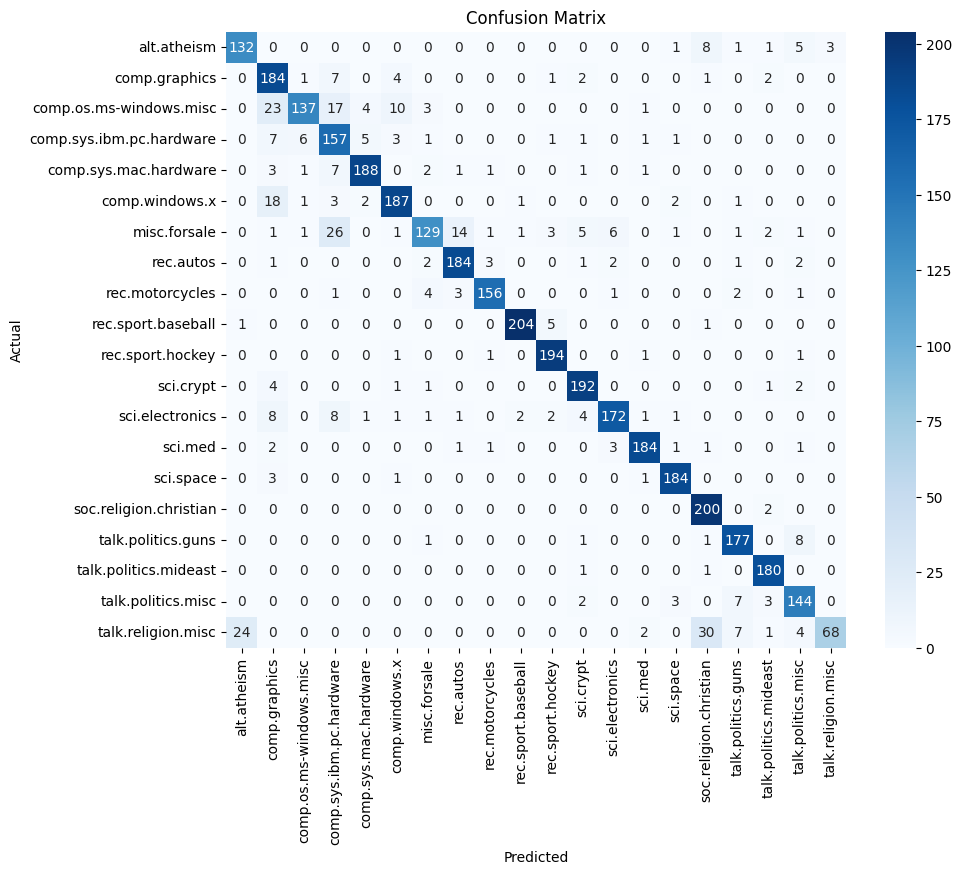

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Understanding the Dataset

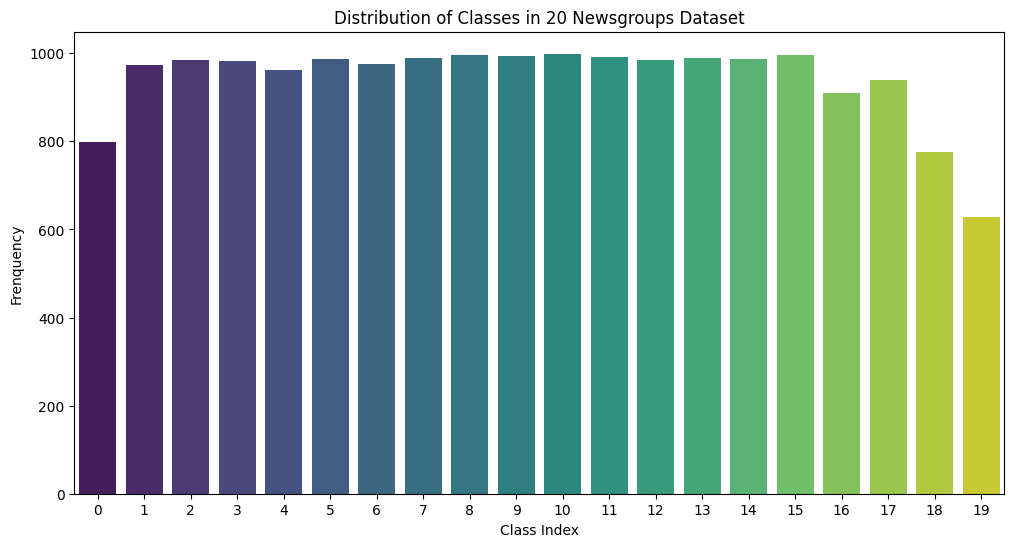

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x=newsgroups.target, palette="viridis")
plt.title('Distribution of Classes in 20 Newsgroups Dataset')
plt.xlabel('Class Index')
plt.ylabel('Frenquency')
plt.show()

## Now let's add Lemmatization to see if it affects the overall performance!

In [54]:
def preprocess_text(text): 
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text     

texts = [preprocess_text(text) for text in texts]

In [55]:
# bag of words representation
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(texts)
y = labels

In [56]:
# datasaet split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((15076, 179221), (15076,))

In [57]:
# Training
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [58]:
# Predict
y_pred = nb_classifier.predict(X_test)

In [59]:
# Evaluate the classifier 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8851458885941644
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.72      0.91      0.80       202
           2       0.92      0.66      0.77       195
           3       0.68      0.85      0.76       183
           4       0.93      0.92      0.92       205
           5       0.89      0.86      0.88       215
           6       0.89      0.65      0.75       193
           7       0.90      0.94      0.92       196
           8       0.96      0.93      0.95       168
           9       0.99      0.97      0.98       211
          10       0.95      0.98      0.96       198
          11       0.91      0.96      0.93       201
          12       0.93      0.84      0.88       202
          13       0.95      0.95      0.95       194
          14       0.93      0.97      0.95       189
          15       0.82      0.99      0.90       202
          16       0.90    

It reduced the accuracy! 

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'bui

In [62]:
type(texts)

list